# HW 7

Nick Goralka

Priciples of EM for HSDD 

10-24-23

### Question 1

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import e, pi

j = 0 + 1j

freq = 1 * 10**9  # 1 Ghz
w = 2 * pi * freq
c = 3e8

lamda = c / freq
r = np.linspace(lamda/100, lamda*10, 1000)
mu = 1.256 * (10 ** -6)
epsilon = 8.85 * (10 ** -12)

beta = w * math.sqrt(mu * epsilon)
squiggle = math.sqrt(mu/epsilon)


def dH_phi (r):
    I_dz = lamda / 100
    t1 = (I_dz/(4* pi) )
    t2 = (e ** (-j*beta*r) ) 
    t3 = (j*beta)/(r) 
    t4 = 1/(r**2)
    return t1 * t2 * (t3 + t4)

def dE_theta (r):
    I_dz = lamda / 100
    t1 = (I_dz / (4 * pi) )
    t2 = e ** (-j*beta*r) 
    t3 = j*w*mu/r 
    t4 = squiggle/(r**2)
    t5 = 1/(j*w*epsilon*(r**3))
    return t1 * t2 * ( t3 +t4 + t5)

dH_mags = np.zeros_like(r)
dE_mags = np.zeros_like(r)
wave_impedances = np.zeros_like(r)
beta_r = np.zeros_like(r)

for i, nu in enumerate(r):
    dH_mags[i] = np.abs(dH_phi(nu))
    dE_mags[i] = np.abs(dE_theta(nu))
    beta_r[i] = beta * nu

dE_series = pd.Series(dE_mags)
dH_series = pd.Series(dH_mags)
df = pd.DataFrame()
df.insert(loc=0, column='beta_r', value=beta_r/lamda)
df.insert(loc=1, column='dE/eta', value=dE_series/squiggle)
df.insert(loc=2, column='dH', value=dH_series)


[None,
 None,
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Near to Far Field Wave Impedance (Unbounded Space)')]

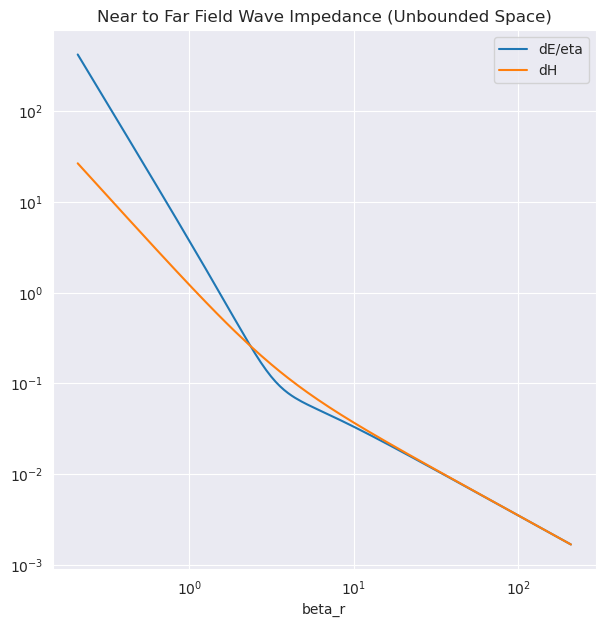

In [15]:
f, ax = plt.subplots(figsize=(7, 7))
sns.lineplot(df, x='beta_r', y='dE/eta' , label="dE/eta")
sns.lineplot(df, x='beta_r', y='dH', label="dH")
sns.set_style("darkgrid")
ax.set(xscale="log", yscale="log", ylabel='', title= 'Near to Far Field Wave Impedance (Unbounded Space)')



# Question 2



In [16]:
f = 5 * 10**9
len_m = 10/(2 * pi * f*math.sqrt(mu * epsilon))
len_cm = 100 * len_m

print (f'Far Field Distance {len_cm} (cm)')
print (f'Far Field Distance {len_cm / 2.53}(in)')

Far Field Distance 9.547368211880991 (cm)
Far Field Distance 3.773663324854147(in)


A signal at 5 GHz and the observation point is more the 3.77 inches away will exhibit far field behavior. The energy distribution will be more matched than the electric field dominating in the near field.